# Chargemet des données

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

data = datasets.load_iris()
X = data.data
Y = data.target

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Question 1

In [2]:
class LinearModule():
    def __init__(self, dimension):
        self.dimension = dimension
        self.theta = np.random.rand(dimension)
        self.cost=[]
        self.accuracies = []
       
    # initialise theta avec des valeurs entre -variance et +variance
    def randomize(self,variance):
        self.theta=(self.theta*2*variance)-variance
      
    # regularisation L1
    def fit(self,X_train,Y_train,max_iter,step,coeff, X_test,Y_test):
        for it in range(max_iter):
            tmp_cost=0
            a = 0.0
            for i in range(len(X_train)):
                predict = self.predict(X_train[i])
                idx = np.random.randint(0,len(X_train)-1)
                self.gradient =  -2 * (Y_train[i] - predict) * X_train[i]  + coeff * np.sign(self.theta) 
                tmp_theta = np.copy(self.theta)
                self.theta -= step*self.gradient
                for j in range(self.dimension):
                    if (tmp_theta[j]*self.theta[j])<0:
                        self.theta[j]=0
                tmp_cost+=(Y_train[i] - predict)**2
                if(round(predict) == Y_train[i]):
                    a+=1.0
            #print(a)
            self.cost.append(tmp_cost/len(X_train) + coeff*np.sum(np.absolute(self.theta)))
            #self.accuracies.append(a/len(X_train))
            self.accuracies.append(self.accuracy(X_test,Y_test))

      
    #extension L2(θ) = |θ|**2
    def fit_L2(self,X_train,Y_train,max_iter,step,coeff, X_test,Y_test):
        for it in range(max_iter):
            tmp_cost=0
            a = 0.0
            for i in range(len(X_train)):
                predict = self.predict(X_train[i])
                idx = np.random.randint(0,len(X_train)-1)
                self.gradient =  -2 * (Y_train[i] - predict) * X_train[i]  + 2*coeff * np.sign(self.theta) * self.theta
                tmp_theta = np.copy(self.theta)
                self.theta -= step*self.gradient
                for j in range(self.dimension):
                    if (tmp_theta[j]*self.theta[j])<0:
                        self.theta[j]=0
                tmp_cost+=(Y_train[i] - predict)**2
            self.cost.append(tmp_cost/len(X_train) + coeff*np.sum(np.absolute(self.theta**2)))
            self.accuracies.append(self.accuracy(X_test,Y_test))
          
    #extension λ1L1(θ) + λ2L2(θ)
    def fit_L1_L2(self,X_train,Y_train,max_iter,step,coeff1,coeff2,X_test,Y_test ):
        for it in range(max_iter):
            tmp_cost=0
            a = 0.0
            for i in range(len(X_train)):
                predict = self.predict(X_train[i])
                idx = np.random.randint(0,len(X_train)-1)
                self.gradient =  -2 * (Y_train[i] - predict) * X_train[i]  + 2*coeff2 * np.sign(self.theta) *self.theta + coeff1 * np.sign(self.theta) 
                tmp_theta = np.copy(self.theta)
                self.theta -= step*self.gradient
                for j in range(self.dimension):
                    if (tmp_theta[j]*self.theta[j])<0:
                        self.theta[j]=0
                tmp_cost+=(Y_train[i] - predict)**2
            self.cost.append(tmp_cost/len(X_train) + coeff1*np.sum(np.absolute(self.theta)) + coeff2*np.sum(np.absolute(self.theta**2)))
            self.accuracies.append(self.accuracy(X_test,Y_test))
           
    # renvoi l'accuracy d'un jeu de test
    def accuracy(self,X_test,Y_test):
        y_prediction = np.round(self.predict(X_test))
        return np.sum(Y_test == y_prediction)*1./len(Y_test)
    
    
    def predict(self, X):
        return np.dot(X,self.theta)


# Question 2

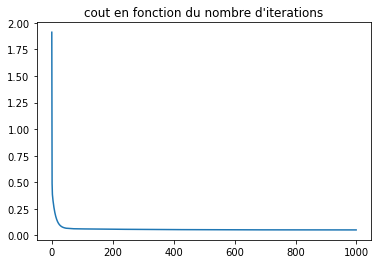

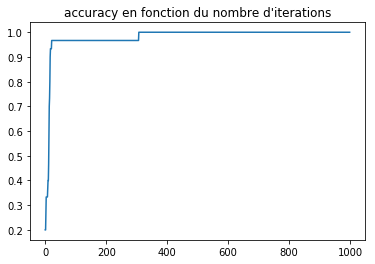

In [3]:
# Trace 2 courbes :
#    - une pour le cout
#    - une pour l'accuracy

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
max_iter = 1000
coeff = 0.0
step = 10**-4

model = LinearModule(len(X[0]))
model.randomize(0.1)

model.fit(X_train,Y_train,max_iter,step,coeff, X_test,Y_test)

plt.plot(range(max_iter),model.cost)
plt.title("Coût en fonction du nombre d'iterations")
plt.show()

plt.plot(range(max_iter),model.accuracies)
plt.title("Accuracy en fonction du nombre d'iterations")
plt.show()


# Question 3 et 4

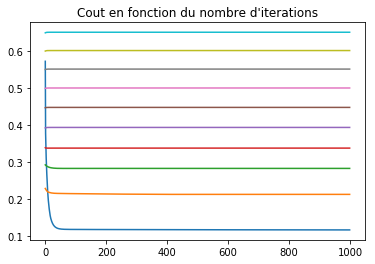

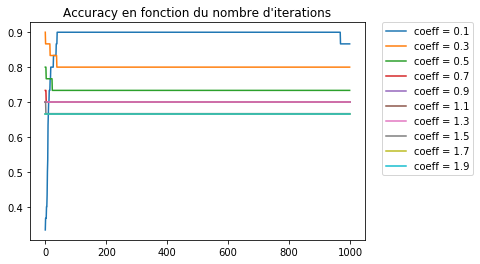

In [4]:
# debute avec un coeff de 0.1 et ajoute nb fois step_coeff à coeff en excecutant à chaque fois l'algo 
# La fonction garde les mêmes jeux de train et test
# Garde le même modéle 
# On change seulement le coefficiant(On a le même theta initial à chaque fois)
def test_coeff(step_coeff,nb, X, Y, max_iter,step):
        coeff = [0.1]
        for i in range(1,nb):
            coeff.append(coeff[i-1] + step_coeff)
        model = LinearModule(4)
        model.randomize(0.1)
        o_theta = model.theta
        fig1, ax1 = plt.subplots()
        fig2, ax2 = plt.subplots()
        legends_label = []
        i = 0
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
        for c in coeff:
            model = LinearModule(4)
            # init theta
            model.theta = o_theta
            model.fit(X_train,Y_train,max_iter,step,coeff[i], X_test,Y_test)
            label = 'coeff = '+str(coeff[i])
            ax1.plot(range(max_iter),model.cost)  
            ax1.set_title("Cout en fonction du nombre d'iterations")
            ax2.plot(range(max_iter),model.accuracies)
            ax2.set_title("Accuracy en fonction du nombre d'iterations")  
            i += 1
            legends_label.append(label)
        plt.legend(legends_label,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        #return np.index(max(model.accuracies))
    
#trace 2 figure comportant les courbes correspondantes à chaque coeff
max_iter = 1000
step = 10**-4
test_coeff(0.2,10, X ,Y ,max_iter,step)

# Plus le coefficiant sera grand plus les résultats seront mauvais.


# Question 5

In [ ]:
# D'apres les courbes obtenues au questions précédentes, plus le coeff est petit meilleur sont l'accuracy et cost.


# Question 6

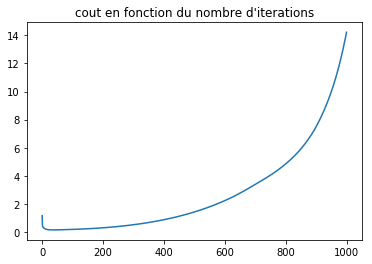

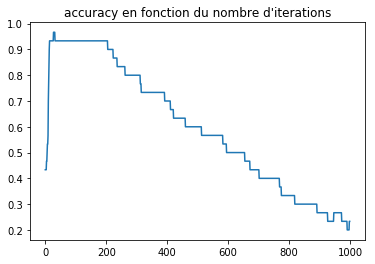

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
max_iter = 1000
coeff = 0.5
step = 10**-4

model = LinearModule(len(X[0]))
model.randomize(0.1)

model.fit_L2(X_train,Y_train,max_iter,step,coeff,X_test,Y_test)


plt.plot(range(max_iter),model.cost)
plt.title("cout en fonction du nombre d'iterations")
plt.show()

plt.plot(range(max_iter),model.accuracies)
plt.title("accuracy en fonction du nombre d'iterations")
plt.show()

# On constate que le coeff donne de mauvais résultat.
# En effet on a un cout qui monte et une accuracy qui descendent alors que l'on veut obtenir l'inverse
# Et plus le coefficiant sera grand plus les résultats seront mauvais. Cet algorithme est plus sensible que le précédant car on additionne par theta**2

# Question 7

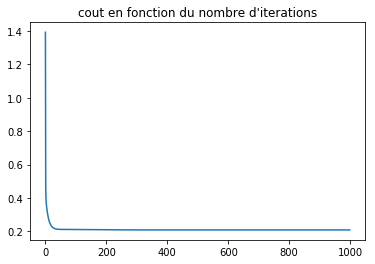

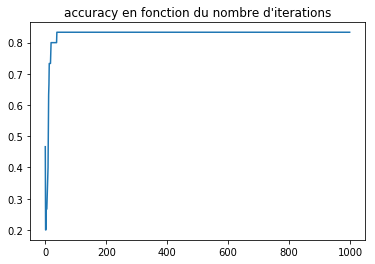

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
max_iter = 1000
coeff1 = 0.15
coeff2= 0.5
step = 10**-4

model = LinearModule(len(X[0]))
model.randomize(0.1)

model.fit_L1_L2(X_train,Y_train,max_iter,step,coeff1,coeff2,X_test,Y_test)


plt.plot(range(max_iter),model.cost)
plt.title("cout en fonction du nombre d'iterations")
plt.show()

plt.plot(range(max_iter),model.accuracies)
plt.title("accuracy en fonction du nombre d'iterations")
plt.show()

# On constate que les coeff1 et coeff2 "s'equilibre".
# En effet lorsqu'on a coeff1 ~= coeff2 on à de bon résultat

# Question 8

In [35]:
from sklearn import linear_model, datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
coeff = [0.1, 0.3, 0.5, 0.7]
for c in coeff:
    lasso = linear_model.Lasso(alpha=c)
    lasso.fit(X_train,Y_train)
    print(lasso.score(X_test,Y_test))
    
#Plus alpha est petit, plus le modéle est précis comme avec L1 et L2

0.897361339234
0.862793272937
0.79010356599
0.679292218393
